In [57]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd
import numpy as np

In [58]:
sub = 0 

movement_data = pd.read_csv('../data/data_movements_0.csv')

In [59]:
movement_data.loc[movement_data.state == "hold"]

,Unnamed: 0,trial,state,sample,time,x,y
173,173,0,hold,173,1.440769,0.234375,0.058594
174,174,0,hold,174,1.443682,0.234375,0.058594
175,175,0,hold,175,1.457888,0.234375,0.058594
176,176,0,hold,176,1.460750,0.234375,0.058594
177,177,0,hold,177,1.475371,0.234375,0.000000
...,...,...,...,...,...,...,...
183006,200,299,hold,183305,1528.780743,0.000000,-0.058594
183007,201,299,hold,183306,1528.784002,0.000000,-0.058594
183008,202,299,hold,183307,1528.799757,0.000000,-0.058594
183009,203,299,hold,183308,1528.803129,0.000000,-0.058594


<Axes: xlabel='x', ylabel='y'>

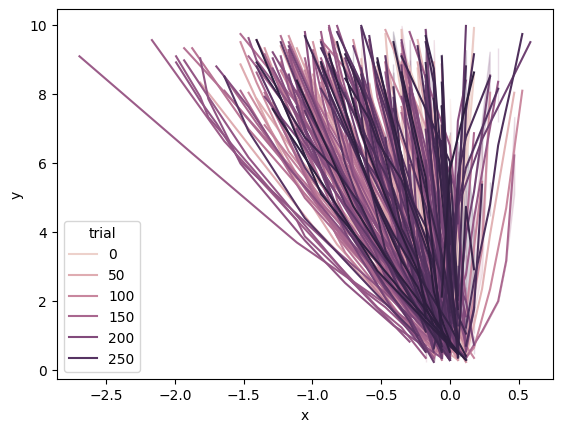

In [60]:
sns.lineplot(data = movement_data.loc[movement_data.state.isin(['reach'])], x = "x", y = "y", hue = "trial")

In [61]:
#Checking that there are 300 reach trials: conclusion = yes
movement_data.loc[(movement_data.trial == 299) & (movement_data.state == 'reach')]

,Unnamed: 0,trial,state,sample,time,x,y
183051,245,299,reach,183350,1529.150758,0.000000,0.527344
183052,246,299,reach,183351,1529.162099,-0.058594,1.171875
183053,247,299,reach,183352,1529.165423,-0.175781,1.933594
183054,248,299,reach,183353,1529.178851,-0.234375,2.871094
183055,249,299,reach,183354,1529.182106,-0.410156,4.453125
183056,250,299,reach,183355,1529.195826,-0.527344,5.625000
183057,251,299,reach,183356,1529.199181,-0.644531,6.855469
183058,252,299,reach,183357,1529.213247,-0.820312,9.492188
183059,253,299,reach,183358,1529.216234,-0.820312,9.492188


In [64]:
# convert x, y coordinates for 'reach' to polar and add these to the data as columns 
# function inspired from https://stackoverflow.com/questions/20924085/python-conversion-between-coordinates 
def cart2pol(x, y):
    r = []
    theta = []
    for i in range(len(x)): 
        r.append(np.sqrt((x[i])**2 + (y[i])**2))
        theta.append(np.arctan2(y[i], x[i]))
    return(r, theta)

# create new subset of movement data only including reach state 
reach_data = movement_data.loc[movement_data.state == 'reach'].copy()

reach_x = reach_data.loc[(reach_data.state == 'reach'), 'x'].values
reach_y  = reach_data.loc[(reach_data.state == 'reach'), 'y'].values

r, theta = cart2pol(reach_x, reach_y)

In [65]:
# add r and theta to the reach dataset as columns 
reach_data['r'] = r
reach_data['theta'] = theta

In [81]:
#subset midpoint data readings
midpoint_reach_data = reach_data.loc[(reach_data.r >= 4) & (reach_data.r <= 6)]